In [1]:
# Oasis Infobyte Data Science Internship
# April - P2 Batch
# Task 1 - **IRIS FLOWER CLASSIFICATION**

In [2]:
# Importing the Required Libraries
# Pandas Library for Dataframe
import pandas as pd

# Numpy Library for Numerical Calculations
import numpy as np

# Matplotlib and Seaborn for Plottings
import matplotlib.pyplot as plt
import seaborn as sns

# Pickle Library for Saving the Model
import pickle

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# KFold and Cross_Val_Score for Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Logistic Regression, Decision Tree, K Neighbors, Naive Bayes, SVC and Linear Discriminant are Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Accuracy Score, Classification Report and Confusion Matrix is for Analysis of Models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Extracting informations from the Dataset
iris = pd.read_csv("iris.csv")


In [4]:
# Checking for null values in the Data
iris.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
# Dropping the not required Column in the Dataset
iris = iris.drop(['Id'], axis=1)
iris.columns


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
iris.shape

(150, 5)

In [9]:
print(iris.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [10]:
print(iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Text(0.5, 0, 'Class')

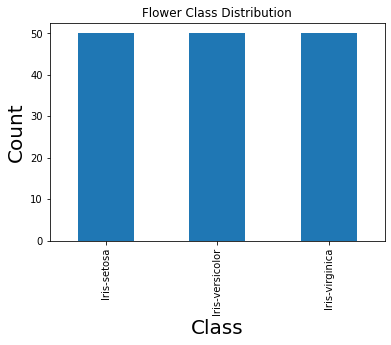

In [11]:
# Visualization of the Data
# Classes distribution over Count of each class Plotting
species_plot = iris['Species'].value_counts().plot.bar(
    title='Flower Class Distribution')
species_plot.set_ylabel('Count', size=20)
species_plot.set_xlabel('Class', size=20)



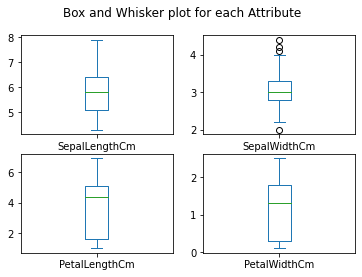

In [12]:
# Box and Whisker Plot
iris.plot(kind='box', subplots=True, layout=(2, 2),
          sharex=False, sharey=False, title="Box and Whisker plot for each Attribute")
plt.show()


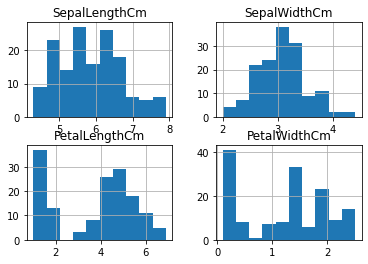

In [13]:
# Plotting Histogram
iris.hist()
plt.show()


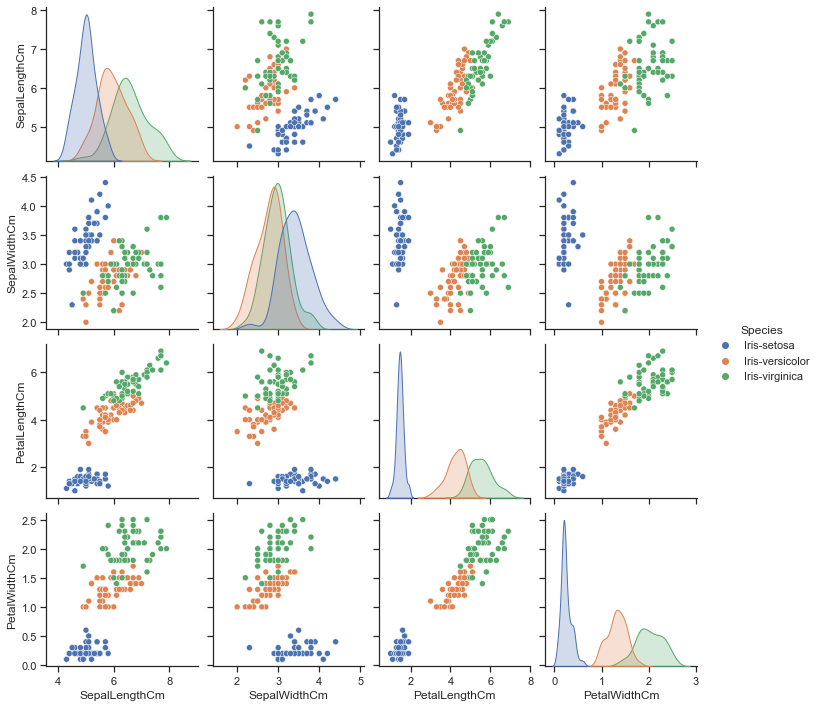

In [14]:
# Multivariate Scatter Plot
sns.set(style="ticks")
sns.pairplot(iris, hue="Species")


In [15]:
# Data Modeling
# Splitting the Dataset into Training and Testing
X = iris.drop(['Species'], axis=1)
Y = iris['Species']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=25)


In [16]:
# Checking the Dimensions of Training and Testing Data
print("X_Train Shape:", X_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Train Shape:", X_train.shape)
print("Y_Test Shape:", Y_test.shape)


X_Train Shape: (112, 4)
X_Test Shape: (38, 4)
Y_Train Shape: (112, 4)
Y_Test Shape: (38,)


In [17]:
# Building the Model
# Creation of Models
# All the Models will be stored in this models list.
models = []

# Linear Models
models.append(('LR', LogisticRegression(
    solver='liblinear', multi_class="auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

# Non-linear Models
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

print("Model Accuracy")

# Evaluating all the Models
names = []
accuracy = []
for name, model in models:

    # 15 Cross Fold Validation of all the Models
    kf = KFold(n_splits=15)
    results = cross_val_score(
        model, X_train, Y_train, cv=kf, scoring='accuracy')

    # Displaying the Accuracy of every Model in Validation
    names.append(name)
    accuracy.append(results)
    message = "%s: Accuracy = %f" % (name, results.mean())
    print(message)


Model Accuracy
LR: Accuracy = 0.955952
LDA: Accuracy = 0.990476
DTC: Accuracy = 0.954762
KNN: Accuracy = 0.972619
GNB: Accuracy = 0.955952
SVC: Accuracy = 0.982143


In [18]:
# Testing Model
# Linear Models
models.append(('LR', LogisticRegression(
    solver='liblinear', multi_class="auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

# Non-linear Models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

In [19]:
# Creating Function(test_model) for Testing the Models
def test_model(model):
    # Training the Dataset with Training Set
    model.fit(X_train, Y_train)

    # Predicting the Values with Testing Set
    predictions = model.predict(X_test)

    # Model Testing Results
    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print("Classification Report:")
    print(classification_report(Y_test, predictions))

In [20]:
# Predicting the Values
for name, model in models:
    print("----------------")
    print("Testing:", name)
    test_model(model)


----------------
Testing: LR
Accuracy: 0.9210526315789473
Confusion Matrix:
[[11  0  0]
 [ 0 13  3]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.81      0.90        16
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.92        38
      macro avg       0.93      0.94      0.93        38
   weighted avg       0.94      0.92      0.92        38

----------------
Testing: LDA
Accuracy: 0.9473684210526315
Confusion Matrix:
[[11  0  0]
 [ 0 15  1]
 [ 0  1 10]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.95        38
      macro avg       0.95      0.95  

In [21]:
# So,The Top 3 Models are,
# 1.   SVC
# 2.   CART
# 3.   LDA